# Advertising Sales Project

In [1]:
#importing all the required liabraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the data

df= pd.read_csv("Advertisingsales.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
#columns 

df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [11]:
df.shape

(200, 5)

In [8]:
#Null values or not 

df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

There is no null value present in the dataset , we can also check the same through heatmap .

<AxesSubplot:>

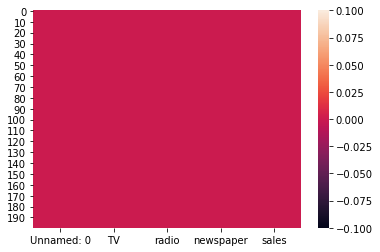

In [9]:
sns.heatmap(df.isnull())

So, there is no null value , we can proceed further for visualization part . 

# Data Visualization 

<AxesSubplot:xlabel='TV', ylabel='sales'>

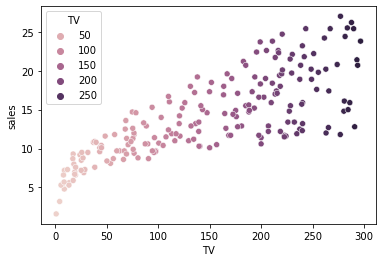

In [12]:
#To check the relationship of feature columns with target column i.e. sales

sns.scatterplot(x="TV",y="sales",data=df,hue="TV")

<AxesSubplot:xlabel='radio', ylabel='sales'>

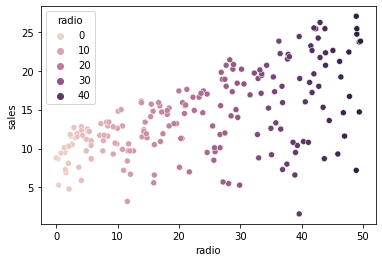

In [13]:
sns.scatterplot(x="radio",y="sales",data=df,hue="radio")

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

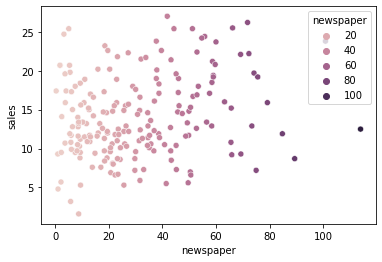

In [14]:
sns.scatterplot(x="newspaper",y="sales",data=df,hue="newspaper")

In [18]:
#correlation 

df_corr= df.corr()
df_corr

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Unmamed 0 is negatively correlated with sales , and TV is highly positive correlated with sales , Rest are also positive correlated with sales .

<AxesSubplot:>

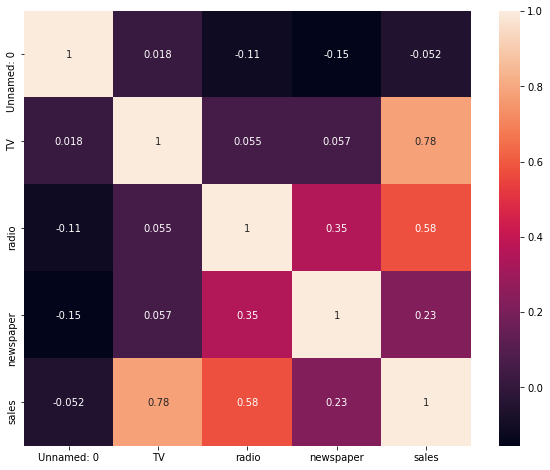

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot= True)

The more the light colour , high the positive correlated . Darker the color , negative the correlation .

In [26]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

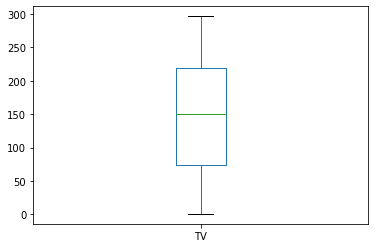

In [22]:
#Checking the outliers of each column 
df['TV'].plot.box()


<AxesSubplot:>

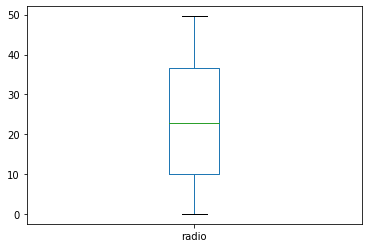

In [23]:
df['radio'].plot.box()

<AxesSubplot:>

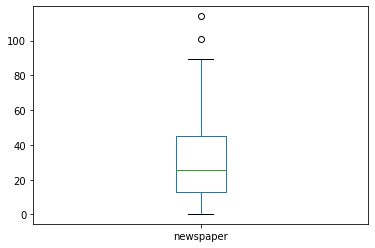

In [24]:
df['newspaper'].plot.box()

<AxesSubplot:>

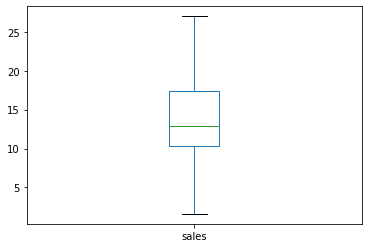

In [25]:
df['sales'].plot.box()

Box plot observations:
    
    There is outlier in newspaper columns , which we can remove .

## Outliers

In [27]:
#Process of removing outliers 

z=np.abs(zscore(df))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [29]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [32]:
z[(16,3)]

3.8411707150992718

In [33]:
z[(101,3)]

3.238153957342154

In [34]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [36]:
df.shape

(200, 5)

In [38]:
df_new.shape   #After removing the outliers

(198, 5)

## Skewness

In [39]:
#checking the skewness

df.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'TV'}>],
       [<AxesSubplot:title={'center':'radio'}>,
        <AxesSubplot:title={'center':'newspaper'}>],
       [<AxesSubplot:title={'center':'sales'}>, <AxesSubplot:>]],
      dtype=object)

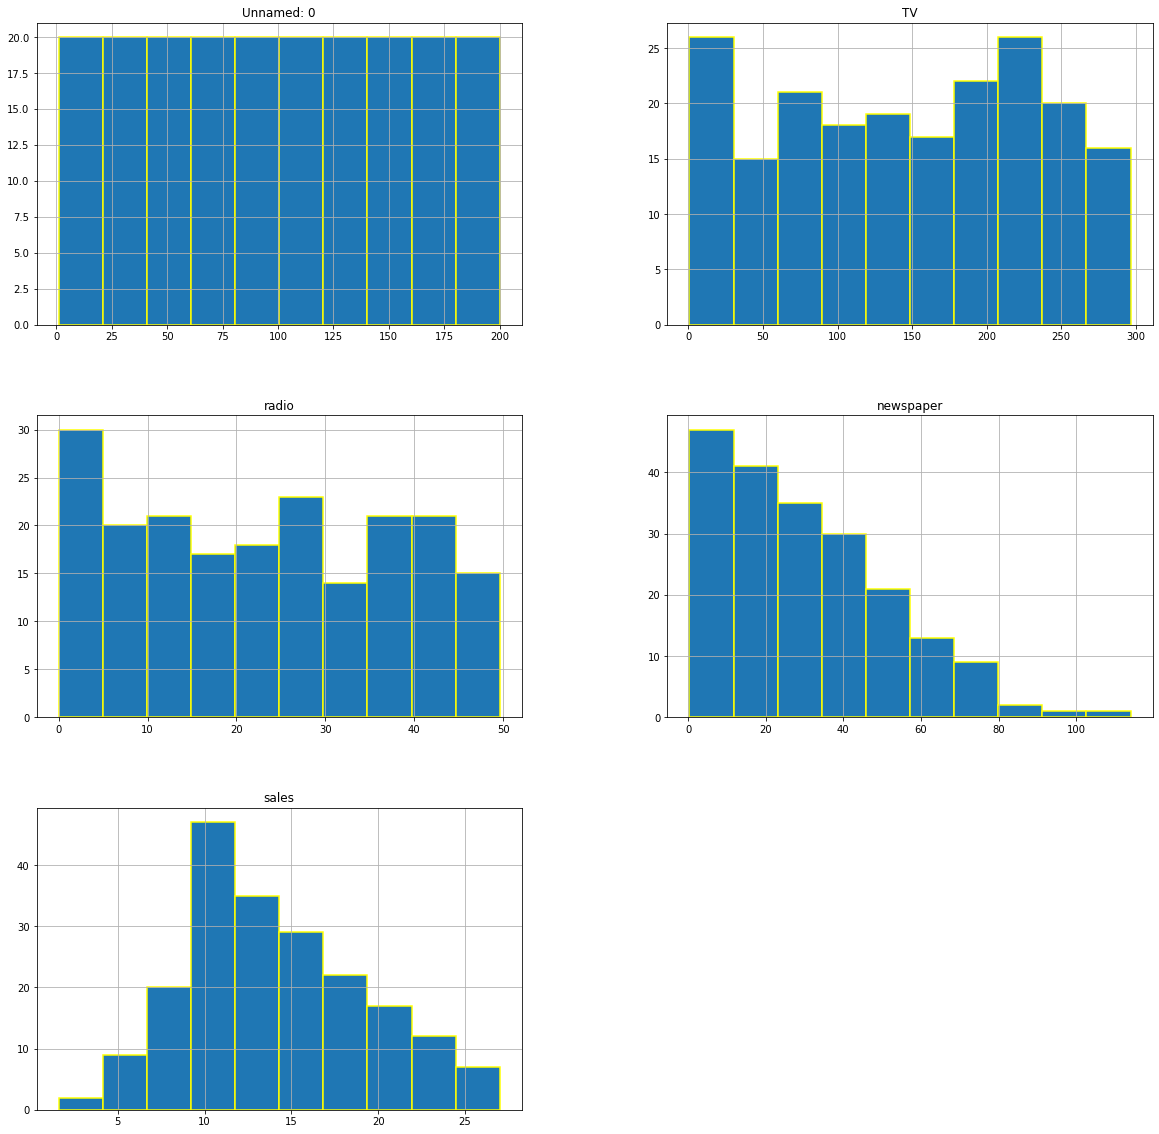

In [41]:
df.hist(edgecolor='yellow',linewidth=1.5,figsize=(20,20))

Skewness is present the dataset.

In [43]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [48]:
#Seperatong the input and output/target column 
x= df.iloc[:,1:4]
x


#not including the unnamed column because of negative correlation

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [49]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

### removing the skewness

In [51]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 9.65192807e-01,  9.73526957e-01,  1.54429626e+00],
       [-1.16762876e+00,  1.06612382e+00,  7.81635855e-01],
       [-1.52047229e+00,  1.46797893e+00,  1.54711875e+00],
       [ 3.36685305e-02,  1.18884353e+00,  1.22781940e+00],
       [ 3.75102673e-01, -7.89065490e-01,  1.22471423e+00],
       [-1.65148974e+00,  1.64777581e+00,  1.70434613e+00],
       [-1.01520320e+00,  6.61327524e-01, -1.29948529e-01],
       [-3.18621798e-01, -1.88422862e-01, -8.49495883e-01],
       [-1.65316432e+00, -1.53005769e+00, -2.06812025e+00],
       [ 6.00688802e-01, -1.47655016e+00, -2.50101105e-01],
       [-9.17118899e-01, -1.17850067e+00, -9.46254925e-02],
       [ 7.79303027e-01,  9.85173409e-02, -1.57165278e+00],
       [-1.42862477e+00,  8.05623798e-01,  1.44982898e+00],
       [-5.68478671e-01, -1.03112881e+00, -1.21867084e+00],
       [ 6.52096291e-01,  6.67625747e-01,  8.13743543e-01],
       [ 5.48212292e-01,  1.57606394e+00,  1.04911106e+00],
       [-8.97922078e-01,  8.99099979e-01

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 9.65192807e-01,  9.73526957e-01,  1.54429626e+00],
       [-1.16762876e+00,  1.06612382e+00,  7.81635855e-01],
       [-1.52047229e+00,  1.46797893e+00,  1.54711875e+00],
       [ 3.36685305e-02,  1.18884353e+00,  1.22781940e+00],
       [ 3.75102673e-01, -7.89065490e-01,  1.22471423e+00],
       [-1.65148974e+00,  1.64777581e+00,  1.70434613e+00],
       [-1.01520320e+00,  6.61327524e-01, -1.29948529e-01],
       [-3.18621798e-01, -1.88422862e-01, -8.49495883e-01],
       [-1.65316432e+00, -1.53005769e+00, -2.06812025e+00],
       [ 6.00688802e-01, -1.47655016e+00, -2.50101105e-01],
       [-9.17118899e-01, -1.17850067e+00, -9.46254925e-02],
       [ 7.79303027e-01,  9.85173409e-02, -1.57165278e+00],
       [-1.42862477e+00,  8.05623798e-01,  1.44982898e+00],
       [-5.68478671e-01, -1.03112881e+00, -1.21867084e+00],
       [ 6.52096291e-01,  6.67625747e-01,  8.13743543e-01],
       [ 5.48212292e-01,  1.57606394e+00,  1.04911106e+00],
       [-8.97922078e-01,  8.99099979e-01

## Regression methods

In [53]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [54]:
from sklearn.metrics import mean_squared_error
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeRegressor
    lm=DecisionTreeRegressor()
    lm.fit(x_train,y_train)
    y_pred=lm.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(rmse)

1.4080934886317997
1.2475430398842504
1.0186146266256724
1.279381953061001
1.1016516525818694
1.0582289378241765
1.2988339759067347
1.1569945391558096
1.2736252243580966
1.3822467437494872
1.2726136312901317
1.6186414056238645
1.1006884897713576
1.2360126507148994
1.2451724962648931
1.1953191535267387
0.9231041177035296
0.8989050578511076
1.3099849640589796
1.2908770802689298
1.4956502589073748
1.1018579350764368
1.103918639953309
1.298833975906735
1.152730618482861
0.9540980192323169
0.9974968671630002
1.3405674962944658
1.1422333254186596
1.3461505161463974
1.203026486521692
1.3608709332518265
1.1424322803350382
0.9509166231812463
1.3069742989752393
1.115999348321739
1.0674949435690337
1.5853018066544358
1.1679430247622995
1.0046859904437502
1.0523422648664464
0.8660254037844383
1.2785526855382106
1.1575182438512512
1.4677337715820344
1.275705390136862
1.5074562157569429
1.2643120059877815
1.6029329179332301
1.5641824275533422
1.047869411248512
1.29251926894962
1.083624669450832
2.48

In [55]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_pred_regressor = regressor.predict(x_test)

In [56]:
y_pred = regressor.predict(x_test)
y_pred

array([17.1, 16.6, 13.4, 10.5, 13.4, 21.7, 19. ,  9.7,  9.6, 14.7, 12.4,
       12.4, 19.4, 12.4, 11.6, 12.2, 13.2, 18.5, 11. , 13.2, 11.8,  6.6,
       20.7, 10.4, 10.9, 25.4,  8.4, 12.8, 11. , 11.9, 19.6,  6.6, 15.5,
       19.2,  4.8,  9.7, 12.4, 16.6,  6.6, 12.4, 19.4, 11.6, 13.4, 10.8,
       13.2,  9.2, 12.8,  6.6,  8.5, 15.9, 12.8, 13.4, 23.7, 20.7, 12.4,
       12.4,  8.7, 15.9, 17.3, 21.7, 23.7, 22.2, 18. ,  7.2, 13.3, 14.7])

In [57]:
dt_accuracy = round(regressor.score(x_train,y_train)*100,2)
dt_accuracy

100.0

Test accuracy of decision tree is 100 .

In [58]:

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [59]:
y_pred = regressor.predict(x_test)
y_pred

array([16.33582702, 15.1498376 , 15.30830271,  9.40382557, 13.93503137,
       20.53136119, 17.75427281,  7.03368497,  9.85280545, 16.62410986,
       10.14268532,  7.85524984, 19.2633865 , 10.49501767, 11.96057016,
       14.6501865 , 14.95440658, 18.0374159 ,  8.74408552, 13.16711025,
       15.41892647,  9.72821689, 21.91091543, 11.70963915, 11.37073319,
       24.70521211,  8.21031129, 12.05607417,  8.60319156, 12.01221837,
       19.67662294,  7.52415228, 14.11947682, 16.71662442,  2.67384423,
        8.2317853 ,  8.45248254, 16.41547315,  4.07579478,  9.3081965 ,
       19.2465924 , 12.16661602, 17.8694321 , 12.10204026, 13.75102403,
       11.94075724, 11.82553514,  5.94907815,  7.7600024 , 19.07983977,
       12.32063993, 18.18448167, 21.98074852, 20.07568368,  8.8806254 ,
        9.16285283,  5.32317359, 15.34161742, 14.90078295, 20.40274888,
       21.60311731, 21.12477285, 18.12833992,  3.93977482, 12.39389751,
       15.19416593])

In [60]:
lr_accuracy = round(regressor.score(x_train,y_train)*100,2)
lr_accuracy

90.44

Logistic regressor accuracy is 90.44

In [61]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

In [62]:
y_pred = regressor.predict(x_test)
y_pred

array([17.587, 15.892, 13.254, 10.616, 13.046, 21.389, 18.47 ,  9.623,
        9.937, 15.42 , 11.747, 10.131, 18.974, 12.11 , 13.352, 12.223,
       14.001, 18.985, 10.418, 12.783, 11.789,  5.238, 20.503, 10.78 ,
       12.37 , 25.347,  9.501, 12.857, 10.484, 13.293, 20.949,  7.124,
       15.59 , 17.517,  5.925,  9.65 , 10.47 , 16.582,  6.767, 10.715,
       18.81 , 11.513, 13.   , 10.451, 13.486,  8.316, 12.73 ,  6.688,
        7.536, 15.981, 12.435, 13.051, 22.676, 19.736, 10.566, 10.655,
        8.493, 15.265, 16.379, 21.104, 22.882, 22.359, 18.571,  7.368,
       13.494, 14.507])

In [63]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

99.7

Randomforest accuracy is 99.7.

# Cross validation method

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
print(cross_val_score(regressor,x,y,cv=5).mean())

0.9762989156515772


## Hypermeter tuning

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [68]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [70]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 7}

## Model Evaluation

In [72]:
Final_mod = RandomForestRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
print((regressor.score(x_test,y_test)*100))

96.61708691162588


## Saving the model

In [73]:
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

In [74]:
preds = regressor.predict(x_test)
print(preds[:40])
print(y_test[:40].values)

[17.587 15.892 13.254 10.616 13.046 21.389 18.47   9.623  9.937 15.42
 11.747 10.131 18.974 12.11  13.352 12.223 14.001 18.985 10.418 12.783
 11.789  5.238 20.503 10.78  12.37  25.347  9.501 12.857 10.484 13.293
 20.949  7.124 15.59  17.517  5.925  9.65  10.47  16.582  6.767 10.715]
[17.3 14.9 13.2 10.1 12.9 22.6 18.3  9.5 10.1 16.7 11.4  9.3 19.6 11.5
 12.2 12.5 15.2 19.   9.7 14.  12.7  1.6 21.4 11.8 11.9 27.   9.7 11.7
 10.4 13.4 21.2  7.6 14.6 17.2  5.3  9.7  9.9 16.6  5.9 10.7]


## Decision Tree Regressor works the best .